In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense

In [ ]:
data_dir = '/content/drive/MyDrive/DLProject/asl/'
# data_dir = '/content/drive/MyDrive/DLProject/arabic/'
# data_dir = '/content/drive/MyDrive/DLProject/indian/'

In [ ]:
x = np.load(data_dir + 'train_imgs.npy')
y = np.load(data_dir + 'train_labels.npy')
# x = x.astype('float32') / 255.0
y = tf.keras.utils.to_categorical(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1, shuffle=True)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(52200, 32, 32, 3) (52200, 29)
(17400, 32, 32, 3) (17400, 29)


In [ ]:
classes = 29
batch_size = 512
epochs = 50
learning_rate = 1e-4

In [ ]:
# Set the CNN model 
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'same', 
                 activation ='relu', input_shape = (32,32,3)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.3))
# model.add(Dropout(0.35))
model.add(Dense(classes, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       7

In [ ]:
# Data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1) # randomly shift images vertically (fraction of total height)

datagen.fit(x_train)

In [ ]:
# Define optimizer and use learning rate reduction
model.compile(optimizer=tf.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="best.h5",
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max')

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=20)

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                              epochs=epochs, validation_data=(x_val, y_val), 
                              verbose=2, callbacks=[model_checkpoint_callback,learning_rate_reduction,early_stopping])

Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.03529, saving model to best.h5
102/102 - 60s - loss: 3.2459 - accuracy: 0.1218 - val_loss: 3.9150 - val_accuracy: 0.0353 - lr: 1.0000e-04 - 60s/epoch - 584ms/step
Epoch 2/50

Epoch 2: val_accuracy improved from 0.03529 to 0.03603, saving model to best.h5
102/102 - 33s - loss: 2.3696 - accuracy: 0.2884 - val_loss: 5.8894 - val_accuracy: 0.0360 - lr: 1.0000e-04 - 33s/epoch - 325ms/step
Epoch 3/50

Epoch 3: val_accuracy improved from 0.03603 to 0.04339, saving model to best.h5
102/102 - 34s - loss: 1.7329 - accuracy: 0.4559 - val_loss: 6.8792 - val_accuracy: 0.0434 - lr: 1.0000e-04 - 34s/epoch - 333ms/step
Epoch 4/50

Epoch 4: val_accuracy improved from 0.04339 to 0.04448, saving model to best.h5
102/102 - 33s - loss: 1.2626 - accuracy: 0.5898 - val_loss: 8.6402 - val_accuracy: 0.0445 - lr: 1.0000e-04 - 33s/epoch - 323ms/step
Epoch 5/50

Epoch 5: val_accuracy improved from 0.04448 to 0.14500, saving model to best.h5
102/102 - 32s -

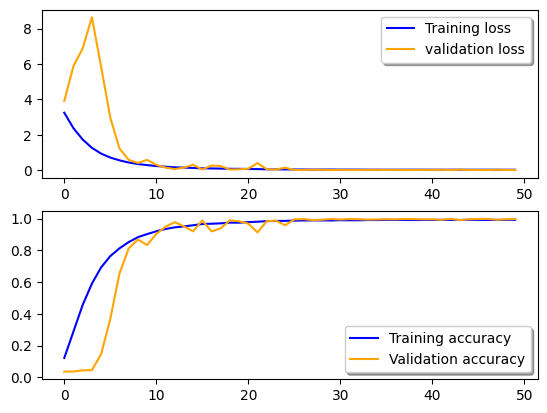

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='orange', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)


ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='orange',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

##Predict ASL

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
model = tf.keras.models.load_model('best.h5')
print("Accuracy of the model is - " , model.evaluate(x_test, y_test)[1]*100 , "%")

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


544/544 [==============================] - 14s 25ms/step - loss: 0.0054 - accuracy: 0.9979
Accuracy of the model is -  99.79310631752014 %


In [ ]:
# Predict on test set
preds = model.predict(x_test)

544/544 [==============================] - 8s 15ms/step


In [ ]:
preds = np.argmax(preds, axis=1) 
targets = np.argmax(y_test, axis=1) 
cm = confusion_matrix(targets, preds)

In [ ]:
np.save(data_dir + 'cn_cm.npy', cm)
np.save(data_dir + 'cnn_targets.npy', targets)
np.save(data_dir + 'cnn_preds.npy', preds)

In [ ]:
print(classification_report(targets, preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       595
           1       1.00      0.99      1.00       617
           2       1.00      1.00      1.00       585
           3       1.00      1.00      1.00       600
           4       1.00      1.00      1.00       615
           5       1.00      1.00      1.00       654
           6       1.00      1.00      1.00       609
           7       1.00      0.99      1.00       615
           8       1.00      1.00      1.00       614
           9       1.00      1.00      1.00       621
          10       1.00      1.00      1.00       582
          11       1.00      1.00      1.00       616
          12       1.00      1.00      1.00       584
          13       1.00      1.00      1.00       578
          14       1.00      1.00      1.00       617
          15       1.00      1.00      1.00       569
          16       1.00      1.00      1.00       583
          17       1.00    

In [ ]:
plt.figure(figsize=(20,15))

# plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d")